In [136]:
import pandas as pd 
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import matplotlib as mlp
%matplotlib inline

In [2]:
transaction_data = pd.read_csv("QVI_transaction_data_1.csv")
monthly_sales = pd.read_csv('monthly_sales.csv',index_col="DATE")
transaction_data.info()
monthly_sales.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January       to December     
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TOT_SALES  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0+ bytes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


Text(0, 0.5, 'TOTAL SALES')

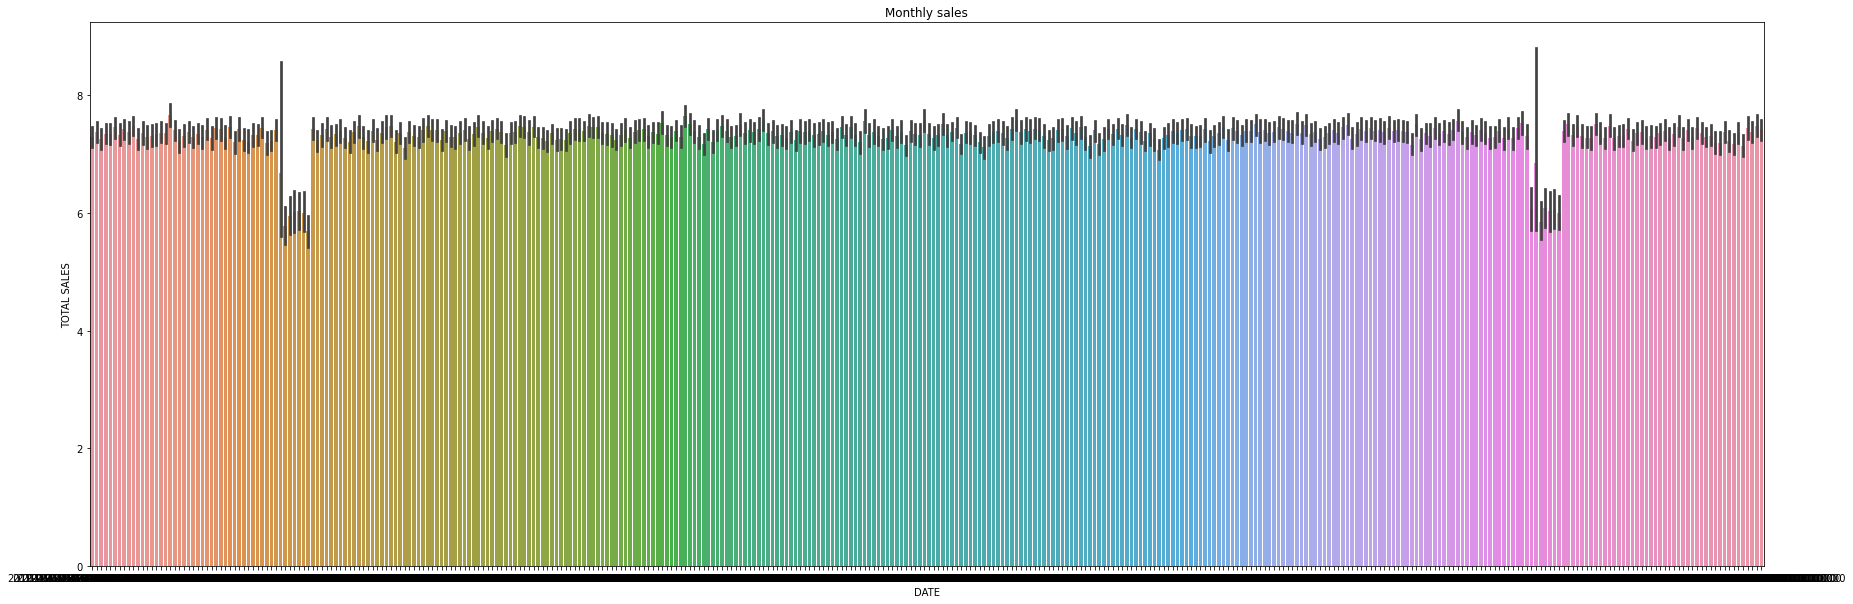

In [3]:
transaction_data["DATE"] = pd.to_datetime(transaction_data["DATE"])
transaction_data.info()

plt.figure(figsize=(30,10))

# Add title
plt.title("Monthly sales")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sb.barplot(x=transaction_data['DATE'], y=transaction_data['TOT_SALES'])

# Add label for vertical axis
plt.ylabel("TOTAL SALES")

In [7]:
transaction_data["DATE"] = pd.to_datetime(transaction_data["DATE"])

In [6]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2019-06-30,4,4106,3138,113,Twisties Chicken270g,2,9.2
1,2019-06-30,4,4196,3540,28,Thins Potato Chips Hot & Spicy 175g,2,6.6
2,2019-06-30,4,4363,4287,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6
3,2019-06-30,43,43147,39609,1,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8
4,2019-06-30,109,109146,111057,44,Thins Chips Light& Tangy 175g,2,6.6


In [8]:
transaction_data.max()

DATE                         2019-06-30 00:00:00
STORE_NBR                                    272
LYLTY_CARD_NBR                           2373711
TXN_ID                                   2415841
PROD_NBR                                     114
PROD_NAME         Woolworths Mild     Salsa 300g
PROD_QTY                                     200
TOT_SALES                                    650
dtype: object

In [9]:
#finding highest sales value and store
transaction_data.max()["TOT_SALES"]

650.0

In [10]:
#finding any missing value in dataframe
transaction_data.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [11]:
monthly=transaction_data.groupby(transaction_data['DATE'].dt.strftime('%B'))['TOT_SALES'].sum().sort_values()
print(monthly)

DATE
February     150665.00
May          157367.65
August       158731.05
April        159845.10
November     160233.70
September    160522.00
June         160538.60
January      162642.30
October      164415.70
July         165275.30
March        166265.20
December     167913.40
Name: TOT_SALES, dtype: float64


In [12]:
vi=monthly.index
type(vi)
monthly_reset=monthly.reset_index()
print (monthly_reset)

         DATE  TOT_SALES
0    February  150665.00
1         May  157367.65
2      August  158731.05
3       April  159845.10
4    November  160233.70
5   September  160522.00
6        June  160538.60
7     January  162642.30
8     October  164415.70
9        July  165275.30
10      March  166265.20
11   December  167913.40


In [13]:
monthly_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       12 non-null     object 
 1   TOT_SALES  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes


In [14]:
monthly_reset.sort_values(by="TOT_SALES")

,DATE,TOT_SALES
0,February,150665.00
1,May,157367.65
2,August,158731.05
3,April,159845.10
4,November,160233.70
5,September,160522.00
6,June,160538.60
7,January,162642.30
8,October,164415.70
9,July,165275.30


In [15]:
monthly_reset['DATE'] = pd.to_datetime(monthly_reset['DATE'], format='%B').dt.month_name().str.slice(stop=3)
print(monthly_reset)

   DATE  TOT_SALES
0   Feb  150665.00
1   May  157367.65
2   Aug  158731.05
3   Apr  159845.10
4   Nov  160233.70
5   Sep  160522.00
6   Jun  160538.60
7   Jan  162642.30
8   Oct  164415.70
9   Jul  165275.30
10  Mar  166265.20
11  Dec  167913.40


In [16]:
monthly_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       12 non-null     object 
 1   TOT_SALES  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes


In [17]:
monthly_reset.describe()

,TOT_SALES
count,12.000000
mean,161201.250000
std,4623.954103
min,150665.000000
25%,159566.587500
50%,160530.300000
75%,164630.600000
max,167913.400000


<AxesSubplot:title={'center':'Monthly sales new'}, xlabel='DATE', ylabel='TOT_SALES'>

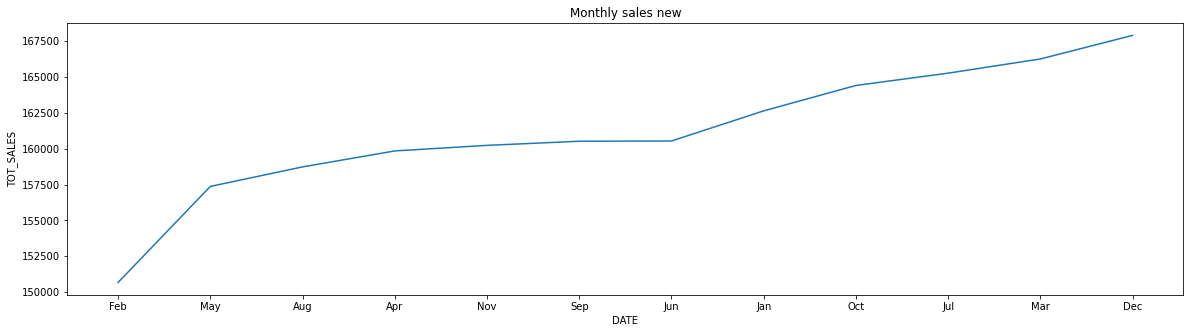

In [18]:
# plt.figure(figsize=(20,5))

# # Add title
# plt.title("Monthly sales new")

# # Linechart showing total sales by months for 2018 and 2019 data
# sb.lineplot(x=monthly_reset["DATE"], y= monthly_reset['TOT_SALES'],data=monthly_reset)


# Monthly sales trend

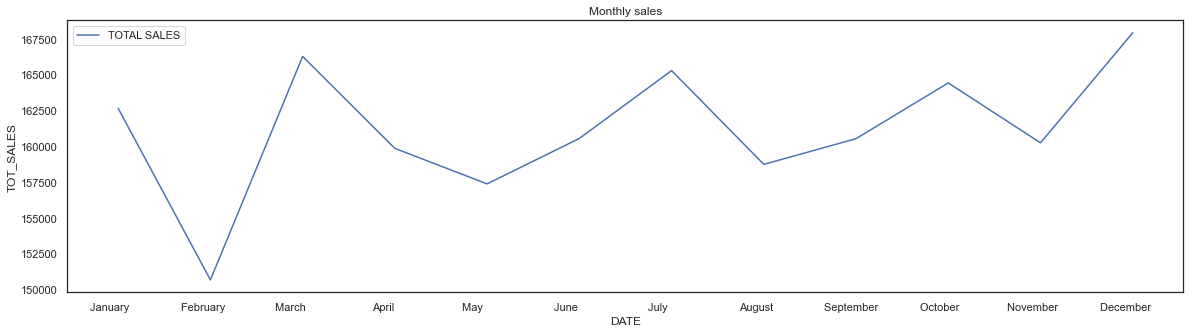

In [322]:
plt.figure(figsize=(20,5))

# Add title
plt.title("Monthly sales")

# Linechart showing total sales by months for 2018 and 2019 data
sb.lineplot(data= monthly_sales['TOT_SALES'],label="TOTAL SALES")
plt.savefig('Monthly_sales_trend.jpg')


In [275]:
## Above graph shows December and Jan had high sales value but a considerable drop in sales in Feb and again pickup in sales value in March
## Overall sales value seems to be arround 160000 value throughout the year.

<AxesSubplot:title={'center':'Monthly sales'}, xlabel='DATE', ylabel='TOT_SALES'>

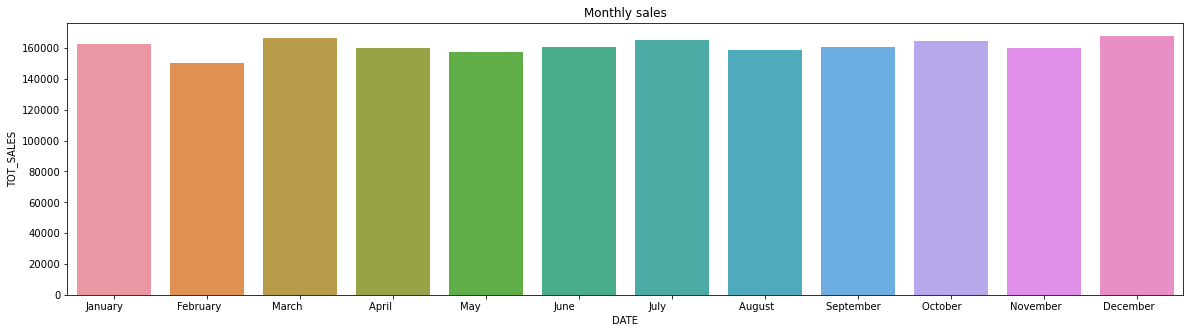

In [20]:
plt.figure(figsize=(20,5))

# Add title
plt.title("Monthly sales")

# Linechart showing total sales by months for 2018 and 2019 data
sb.barplot(x= monthly_sales.index,y=monthly_sales['TOT_SALES'] ,label="TOTAL SALES")


In [21]:
#grouping data store number wise to get total sales per store
transaction_data.groupby(transaction_data['STORE_NBR'])['TOT_SALES'].sum()

STORE_NBR
1       2393.60
2       2005.80
3      12802.45
4      14647.65
5       9500.80
         ...   
268     2601.05
269    11221.80
270    11293.95
271     9721.80
272     4653.95
Name: TOT_SALES, Length: 272, dtype: float64

In [22]:
df=transaction_data.groupby(['STORE_NBR']).TOT_SALES.agg([sum])
print (df)


#store_data = pd.DataFrame(transaction_data.groupby(transaction_data['STORE_NBR'])['TOT_SALES'].sum())
#print (store_data)

#store_data = transaction_data.groupby(transaction_data['STORE_NBR'])['TOT_SALES'].sum()
#print(store_data)

#store_data.info()

                sum
STORE_NBR          
1           2393.60
2           2005.80
3          12802.45
4          14647.65
5           9500.80
...             ...
268         2601.05
269        11221.80
270        11293.95
271         9721.80
272         4653.95

[272 rows x 1 columns]


In [23]:
mi = df.index
type(mi)

pandas.core.indexes.numeric.Int64Index

In [24]:
df1=df.reset_index()
print(df1)

sorted_TOT_sales=df1.sort_values(by='sum')
print(sorted_TOT_sales)


     STORE_NBR       sum
0            1   2393.60
1            2   2005.80
2            3  12802.45
3            4  14647.65
4            5   9500.80
..         ...       ...
267        268   2601.05
268        269  11221.80
269        270  11293.95
270        271   9721.80
271        272   4653.95

[272 rows x 2 columns]
     STORE_NBR       sum
210        211      5.20
75          76      6.00
10          11      6.70
251        252      7.40
205        206      7.60
..         ...       ...
236        237  15539.50
39          40  15559.50
164        165  15973.75
87          88  16333.25
225        226  18905.45

[272 rows x 2 columns]


In [25]:
df.describe()

,sum
count,272.000000
mean,7111.819853
std,4717.211272
min,5.200000
25%,2899.425000
50%,5972.625000
75%,10952.775000
max,18905.450000


In [26]:
bottom10_stores=sorted_TOT_sales.head(10)
print (bottom10_stores)

     STORE_NBR    sum
210        211    5.2
75          76    6.0
10          11    6.7
251        252    7.4
205        206    7.6
91          92    9.2
192        193   13.1
84          85   13.9
30          31   14.8
116        117  161.8


In [27]:
top10_stores=sorted_TOT_sales.tail(10)
print(top10_stores)

     STORE_NBR       sum
25          26  14469.30
202        203  14551.60
3            4  14647.65
198        199  14797.00
57          58  15251.45
236        237  15539.50
39          40  15559.50
164        165  15973.75
87          88  16333.25
225        226  18905.45


In [315]:
df.max()

sum    18905.45
dtype: float64

In [314]:
df.min()

sum    5.2
dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 226 to 211
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sum     272 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


TypeError: 'Int64Index' object is not callable

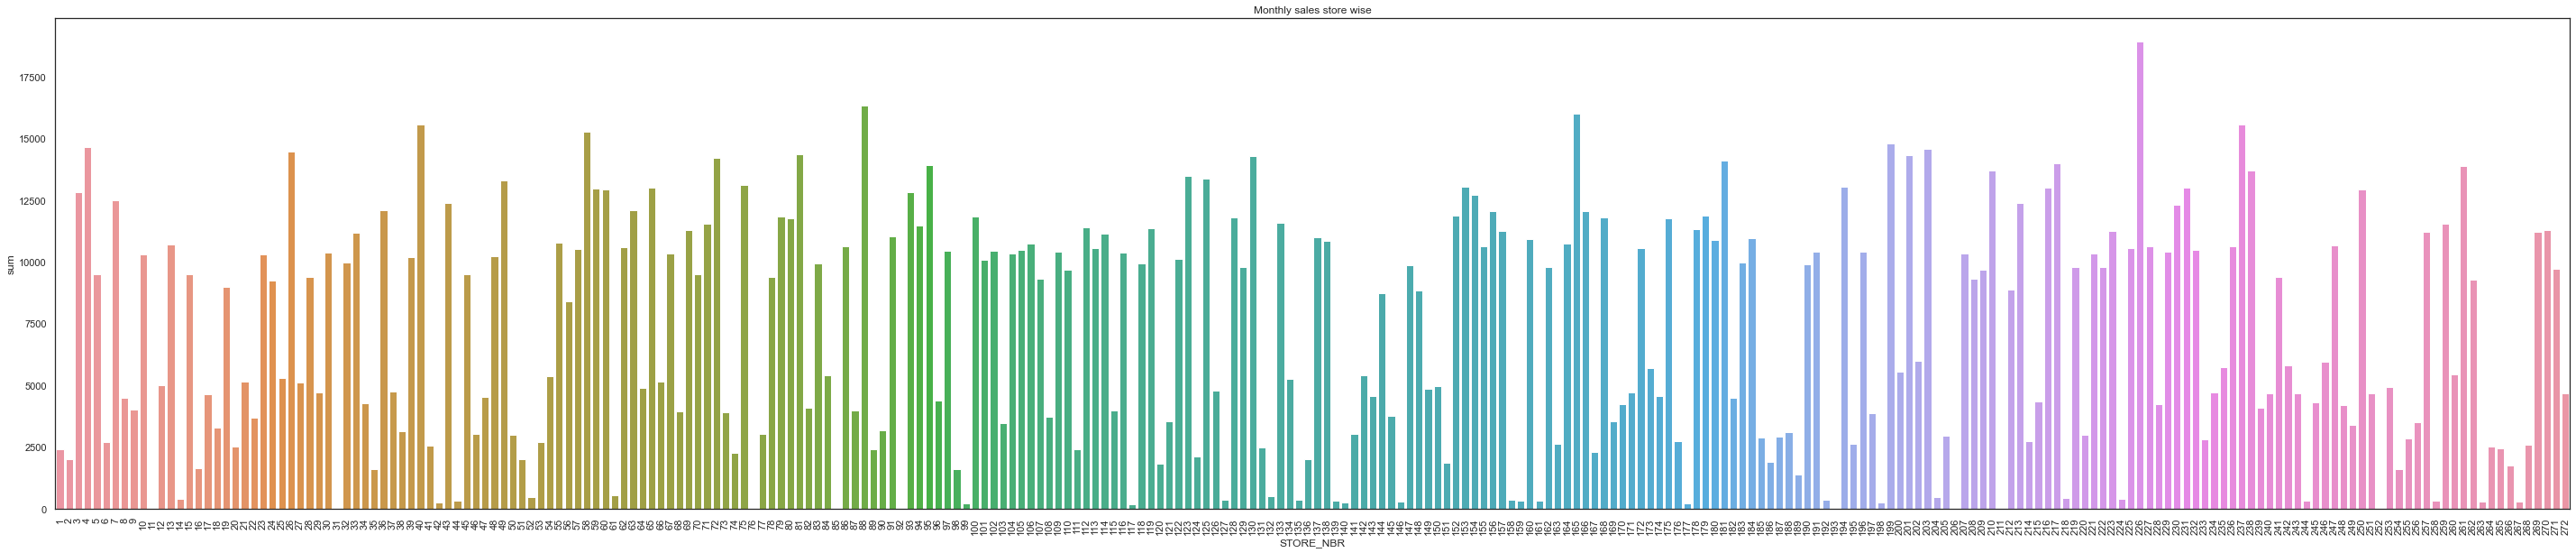

In [313]:

plt.figure(figsize=(50,10))

# Add title
plt.title("Monthly sales store wise")

# barchart showing total sales for each store
sb.barplot(x= df1.index,y=df1['sum'] ,label="TOTAL SALES per store")
plt.xlabel=("store number")
plt.xticks(rotation=90)
plt.savefig('Storewise_sales.jpg')

In [31]:
df1.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STORE_NBR  272 non-null    int64  
 1   sum        272 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


In [32]:
customer= pd.read_csv("QVI_purchase_behaviour.csv")
customer.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [33]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [34]:
pr_customer=customer.groupby(['PREMIUM_CUSTOMER']).LIFESTAGE.agg([len])
print (pr_customer)


                    len
PREMIUM_CUSTOMER       
Budget            24470
Mainstream        29245
Premium           18922


In [35]:
#premium customer count details based on life stage
pr_customer=customer.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).LIFESTAGE.agg([len])
print (pr_customer)

                                          len
PREMIUM_CUSTOMER LIFESTAGE                   
Budget           MIDAGE SINGLES/COUPLES  1504
                 NEW FAMILIES            1112
                 OLDER FAMILIES          4675
                 OLDER SINGLES/COUPLES   4929
                 RETIREES                4454
                 YOUNG FAMILIES          4017
                 YOUNG SINGLES/COUPLES   3779
Mainstream       MIDAGE SINGLES/COUPLES  3340
                 NEW FAMILIES             849
                 OLDER FAMILIES          2831
                 OLDER SINGLES/COUPLES   4930
                 RETIREES                6479
                 YOUNG FAMILIES          2728
                 YOUNG SINGLES/COUPLES   8088
Premium          MIDAGE SINGLES/COUPLES  2431
                 NEW FAMILIES             588
                 OLDER FAMILIES          2274
                 OLDER SINGLES/COUPLES   4750
                 RETIREES                3872
                 YOUNG FAMILIES   

In [36]:
ci= pr_customer.index
type(ci)
pr_customer.reset_index()

,PREMIUM_CUSTOMER,LIFESTAGE,len
0,Budget,MIDAGE SINGLES/COUPLES,1504
1,Budget,NEW FAMILIES,1112
2,Budget,OLDER FAMILIES,4675
3,Budget,OLDER SINGLES/COUPLES,4929
4,Budget,RETIREES,4454
5,Budget,YOUNG FAMILIES,4017
6,Budget,YOUNG SINGLES/COUPLES,3779
7,Mainstream,MIDAGE SINGLES/COUPLES,3340
8,Mainstream,NEW FAMILIES,849
9,Mainstream,OLDER FAMILIES,2831


In [317]:
group_data=pr_customer.reset_index()
print(group_data)
group_data.to_csv('Premium_customer_wise.csv')

   PREMIUM_CUSTOMER               LIFESTAGE   len
0            Budget  MIDAGE SINGLES/COUPLES  1504
1            Budget            NEW FAMILIES  1112
2            Budget          OLDER FAMILIES  4675
3            Budget   OLDER SINGLES/COUPLES  4929
4            Budget                RETIREES  4454
5            Budget          YOUNG FAMILIES  4017
6            Budget   YOUNG SINGLES/COUPLES  3779
7        Mainstream  MIDAGE SINGLES/COUPLES  3340
8        Mainstream            NEW FAMILIES   849
9        Mainstream          OLDER FAMILIES  2831
10       Mainstream   OLDER SINGLES/COUPLES  4930
11       Mainstream                RETIREES  6479
12       Mainstream          YOUNG FAMILIES  2728
13       Mainstream   YOUNG SINGLES/COUPLES  8088
14          Premium  MIDAGE SINGLES/COUPLES  2431
15          Premium            NEW FAMILIES   588
16          Premium          OLDER FAMILIES  2274
17          Premium   OLDER SINGLES/COUPLES  4750
18          Premium                RETIREES  3872


# Customer membership count based on lifestage

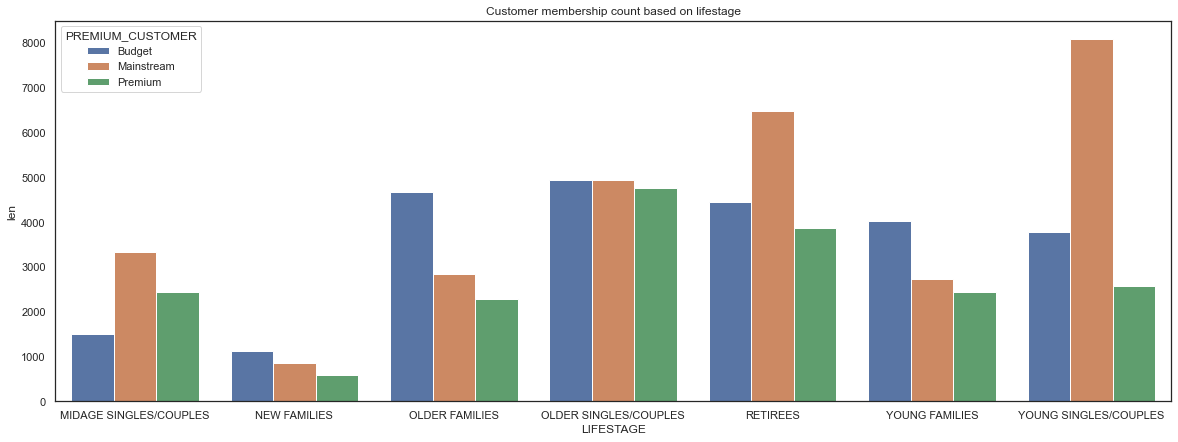

In [318]:
 plt.figure(figsize=(20, 7))
plt.title("Customer membership count based on lifestage")
sb.barplot(x=group_data.LIFESTAGE, y=group_data.len,hue=group_data.PREMIUM_CUSTOMER)
plt.savefig('Lifestage_wise_sales.jpg')

# Merging Customer data and transaction data based on LYLTY_CARD_NBR column

In [45]:
merge_all = pd.merge(transaction_data,customer)
merge_all.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2019-06-30,4,4106,3138,113,Twisties Chicken270g,2,9.2,MIDAGE SINGLES/COUPLES,Budget
1,2019-06-27,4,4106,3137,78,Thins Chips Salt & Vinegar 175g,2,6.6,MIDAGE SINGLES/COUPLES,Budget
2,2019-04-13,4,4106,3136,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,MIDAGE SINGLES/COUPLES,Budget
3,2018-10-09,4,4106,3135,78,Thins Chips Salt & Vinegar 175g,2,6.6,MIDAGE SINGLES/COUPLES,Budget
4,2019-06-30,4,4196,3540,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,MIDAGE SINGLES/COUPLES,Budget


# Spliting product description into product name and weight in gms colum

In [181]:
result = merge_all['PROD_NAME'].str.split('(\d+)', expand=True)
#result = result.loc[:,[1,2]]
#result.rename(columns={1:'PROD_NAME1', 2:'Weight_gm'}, inplace=True)
merge_all['PROD_NAME_new'] = result[0]
merge_all['Weight_gms'] = result[1]
print(merge_all)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2019-06-30          4            4106    3138       113   
1      2019-06-27          4            4106    3137        78   
2      2019-04-13          4            4106    3136        28   
3      2018-10-09          4            4106    3135        78   
4      2019-06-30          4            4196    3540        28   
...           ...        ...             ...     ...       ...   
264831 2018-07-01        197          197341  197303        89   
264832 2018-07-01        245          245339  247845         7   
264833 2018-07-01         74           74003   72864        79   
264834 2018-07-01        169          169401  171542       112   
264835 2018-07-01        205          205430  204503        37   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0                           Twisties Chicken270g         2        9.2   
1               Thins Chips Salt &  Vinegar 175g         2   

In [199]:
#grouping based on package weight in gms
Packweight_wise =merge_all.groupby(['Weight_gms','PROD_NAME_new']).TOT_SALES.agg([sum])
print(Packweight_wise.head)

<bound method NDFrame.head of                                                       sum
Weight_gms PROD_NAME_new                                 
110        Cobs Popd Sea Salt  Chips              23852.6
           Cobs Popd Sour Crm  &Chives Chips      22944.4
           Cobs Popd Swt/Chlli &Sr/Cream Chips    23772.8
           Infuzions BBQ Rib   Prawn Crackers     23111.6
           Infuzions SourCream&Herbs Veg Strws    22701.2
...                                                   ...
380        Dorito Corn Chp     Supreme            40352.0
           Smiths Crnkle Chip  Orgnl Big Bag      36367.6
70         Infuzions Mango     Chutny Papadums     6852.0
90         Snbts Whlgrn Crisps Cheddr&Mstrd        5076.2
           Sunbites Whlegrn    Crisps Frch/Onin    4600.2

[114 rows x 1 columns]>


In [266]:
pi=Packweight_wise.index
type(pi)
Packweight_wise.reset_index()
new_Packweight_wise= Packweight_wise.reset_index()
print(new_Packweight_wise)
new_Packweight_wise.info()


    Weight_gms                          PROD_NAME_new      sum
0          110             Cobs Popd Sea Salt  Chips   23852.6
1          110     Cobs Popd Sour Crm  &Chives Chips   22944.4
2          110   Cobs Popd Swt/Chlli &Sr/Cream Chips   23772.8
3          110    Infuzions BBQ Rib   Prawn Crackers   23111.6
4          110   Infuzions SourCream&Herbs Veg Strws   22701.2
..         ...                                    ...      ...
109        380           Dorito Corn Chp     Supreme   40352.0
110        380     Smiths Crnkle Chip  Orgnl Big Bag   36367.6
111         70   Infuzions Mango     Chutny Papadums    6852.0
112         90      Snbts Whlgrn Crisps Cheddr&Mstrd    5076.2
113         90  Sunbites Whlegrn    Crisps Frch/Onin    4600.2

[114 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Weight_gms     114 non-

In [267]:
new_Packweight_wise.rename(columns = {'sum':'TOTAL_sales'}, inplace = True)
new_Packweight_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Weight_gms     114 non-null    object 
 1   PROD_NAME_new  114 non-null    object 
 2   TOTAL_sales    114 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.8+ KB


# Ploting weight wise Total sale value


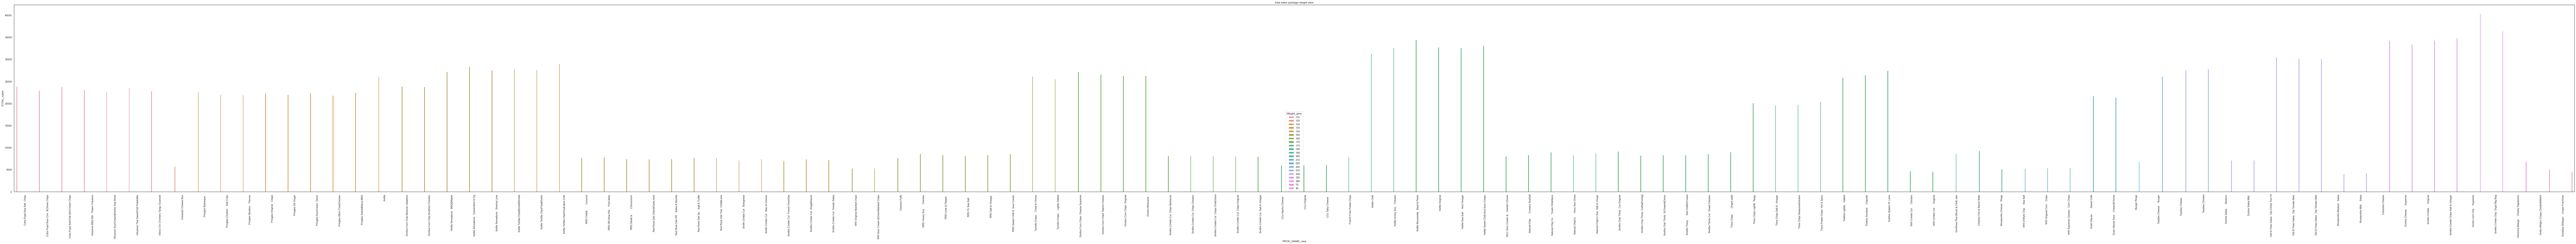

In [204]:
plt.figure(figsize=(200, 15))
plt.title("total sales package weight wise")
sb.barplot(x=new_Packweight_wise.PROD_NAME_new, y= new_Packweight_wise.TOTAL_sales, hue= new_Packweight_wise.Weight_gms )
plt.xticks(rotation=90)
plt.savefig('Packweight_wise_sales.jpg')

In [268]:
new_Packweight_wise['Weight_gms']= new_Packweight_wise['Weight_gms'].astype(str).astype(int)
new_Packweight_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Weight_gms     114 non-null    int32  
 1   PROD_NAME_new  114 non-null    object 
 2   TOTAL_sales    114 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 2.4+ KB


     Weight_gms                          PROD_NAME_new  TOTAL_sales
110         380     Smiths Crnkle Chip  Orgnl Big Bag       36367.6
109         380           Dorito Corn Chp     Supreme       40352.0
105         330                       Cheezels Cheese       34296.9
108         330   Smiths Crinkle Chips Salt & Vinegar       34804.2
107         330          Smiths Crinkle      Original       34302.6
..          ...                                    ...          ...
3           110    Infuzions BBQ Rib   Prawn Crackers       23111.6
2           110   Cobs Popd Swt/Chlli &Sr/Cream Chips       23772.8
112          90      Snbts Whlgrn Crisps Cheddr&Mstrd        5076.2
113          90  Sunbites Whlegrn    Crisps Frch/Onin        4600.2
111          70   Infuzions Mango     Chutny Papadums        6852.0

[114 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 110 to 111
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  -----

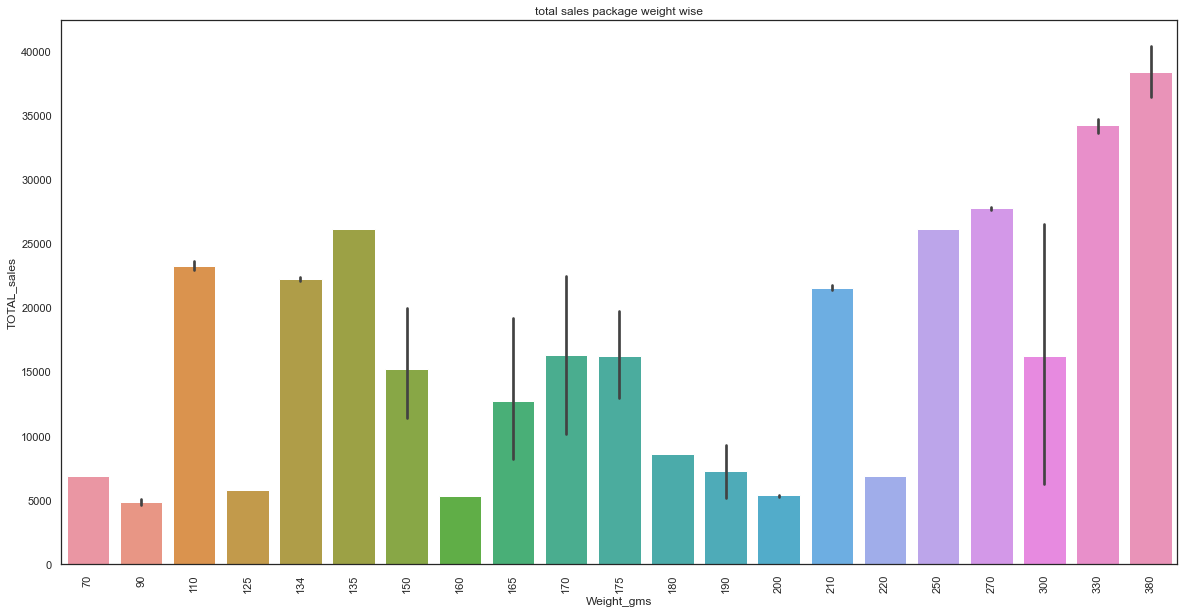

In [273]:
new_Packweight_wise22 = new_Packweight_wise.sort_values (by='Weight_gms', ascending=False)
print(new_Packweight_wise22)
new_Packweight_wise22.info()
plt.figure(figsize=(20, 10))
plt.title("total sales package weight wise")
sb.barplot(x=new_Packweight_wise.Weight_gms, y= new_Packweight_wise.TOTAL_sales)
plt.xticks(rotation=90)
plt.savefig('Packweight_wise_sales1.jpg')

# 1) The Above graph clearly indicates customer are more inclinded toward higher weight packagaes mostly above 200gms

# 2) 70gm to 135gms are least prefered package sizes. 

In [102]:
#grouping based on membership type ( PREMIUM_CUSTOMER)
lifestage =merge_all.groupby(['PREMIUM_CUSTOMER',LIFESTAGE']).TOT_SALES.agg([sum])
print(lifestage.head)

<bound method NDFrame.head of                                                sum
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           MIDAGE SINGLES/COUPLES   35514.80
                 NEW FAMILIES             21928.45
                 OLDER FAMILIES          168363.25
                 OLDER SINGLES/COUPLES   136769.80
                 RETIREES                113147.80
                 YOUNG FAMILIES          139345.85
                 YOUNG SINGLES/COUPLES    61141.60
Mainstream       MIDAGE SINGLES/COUPLES   90803.85
                 NEW FAMILIES             17013.90
                 OLDER FAMILIES          103445.55
                 OLDER SINGLES/COUPLES   133393.80
                 RETIREES                155677.05
                 YOUNG FAMILIES           92788.75
                 YOUNG SINGLES/COUPLES   157621.60
Premium          MIDAGE SINGLES/COUPLES   58432.65
                 NEW FAMILIES             11491.10
                 OLDER FAMILIES           81958.40
 

In [93]:
li = lifestage.index
type(li)
lifestage.reset_index()

,PREMIUM_CUSTOMER,LIFESTAGE,sum
0,Budget,MIDAGE SINGLES/COUPLES,35514.80
1,Budget,NEW FAMILIES,21928.45
2,Budget,OLDER FAMILIES,168363.25
3,Budget,OLDER SINGLES/COUPLES,136769.80
4,Budget,RETIREES,113147.80
5,Budget,YOUNG FAMILIES,139345.85
6,Budget,YOUNG SINGLES/COUPLES,61141.60
7,Mainstream,MIDAGE SINGLES/COUPLES,90803.85
8,Mainstream,NEW FAMILIES,17013.90
9,Mainstream,OLDER FAMILIES,103445.55


In [94]:
new_lf1= lifestage.reset_index()
print(new_lf1)
new_lf1.info()

   PREMIUM_CUSTOMER               LIFESTAGE        sum
0            Budget  MIDAGE SINGLES/COUPLES   35514.80
1            Budget            NEW FAMILIES   21928.45
2            Budget          OLDER FAMILIES  168363.25
3            Budget   OLDER SINGLES/COUPLES  136769.80
4            Budget                RETIREES  113147.80
5            Budget          YOUNG FAMILIES  139345.85
6            Budget   YOUNG SINGLES/COUPLES   61141.60
7        Mainstream  MIDAGE SINGLES/COUPLES   90803.85
8        Mainstream            NEW FAMILIES   17013.90
9        Mainstream          OLDER FAMILIES  103445.55
10       Mainstream   OLDER SINGLES/COUPLES  133393.80
11       Mainstream                RETIREES  155677.05
12       Mainstream          YOUNG FAMILIES   92788.75
13       Mainstream   YOUNG SINGLES/COUPLES  157621.60
14          Premium  MIDAGE SINGLES/COUPLES   58432.65
15          Premium            NEW FAMILIES   11491.10
16          Premium          OLDER FAMILIES   81958.40
17        

In [97]:
new_lf1.rename(columns = {'sum':'TOTAL_sales'}, inplace = True)
print(new_lf1)

   PREMIUM_CUSTOMER               LIFESTAGE      TOTAL
0            Budget  MIDAGE SINGLES/COUPLES   35514.80
1            Budget            NEW FAMILIES   21928.45
2            Budget          OLDER FAMILIES  168363.25
3            Budget   OLDER SINGLES/COUPLES  136769.80
4            Budget                RETIREES  113147.80
5            Budget          YOUNG FAMILIES  139345.85
6            Budget   YOUNG SINGLES/COUPLES   61141.60
7        Mainstream  MIDAGE SINGLES/COUPLES   90803.85
8        Mainstream            NEW FAMILIES   17013.90
9        Mainstream          OLDER FAMILIES  103445.55
10       Mainstream   OLDER SINGLES/COUPLES  133393.80
11       Mainstream                RETIREES  155677.05
12       Mainstream          YOUNG FAMILIES   92788.75
13       Mainstream   YOUNG SINGLES/COUPLES  157621.60
14          Premium  MIDAGE SINGLES/COUPLES   58432.65
15          Premium            NEW FAMILIES   11491.10
16          Premium          OLDER FAMILIES   81958.40
17        

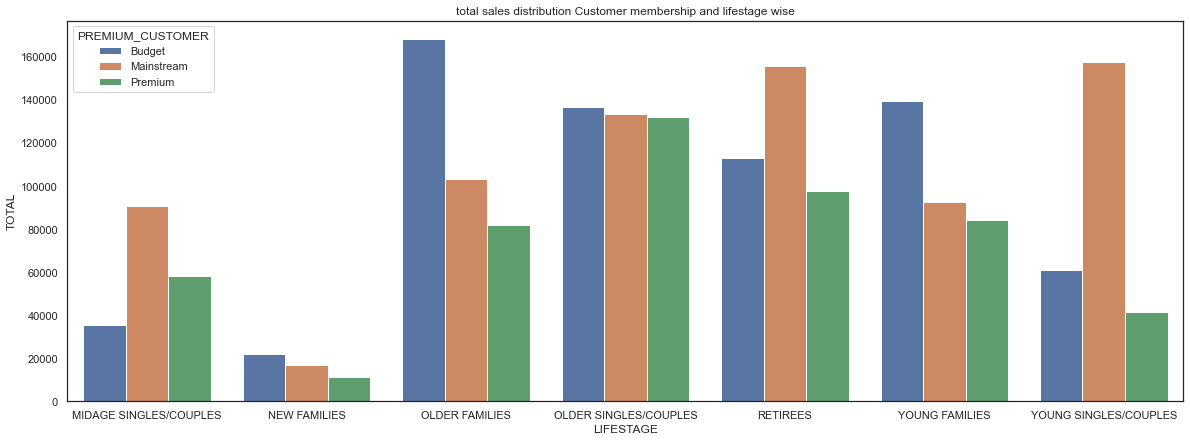

In [320]:
 plt.figure(figsize=(20, 7))
plt.title("total sales distribution Customer membership and lifestage wise")
sb.barplot(x=new_lf1.LIFESTAGE, y= new_lf1.TOTAL, hue= new_lf1.PREMIUM_CUSTOMER )
plt.savefig('tot_sales_Cust_membership_based.jpg')

In [274]:
## From above plot we can clearly see that New Families & Midage Single/Couples contribute to the lowest overall sales value. This group needs to be targeted to increase sale value 
## OLDER SINGLES/COUPLES have the highest sales value
## Mainstream customer membership type has the most sales values in almost all lifestage types 


# All product wise sales

In [106]:
productwise_sales =merge_all.groupby(['LIFESTAGE','PROD_NAME']).TOT_SALES.agg([sum])
productwise_sales.rename(columns = {'sum':'TOTAL_sales'}, inplace = True)
print(productwise_sales)

                                                               TOTAL_sales
LIFESTAGE              PROD_NAME                                          
MIDAGE SINGLES/COUPLES Burger Rings 220g                             660.1
                       CCs Nacho Cheese    175g                      638.4
                       CCs Original 175g                             550.2
                       CCs Tasty Cheese    175g                      529.2
                       Cheetos Chs & Bacon Balls 190g                861.3
...                                                                    ...
YOUNG SINGLES/COUPLES  WW Sour Cream &OnionStacked Chips 160g        647.9
                       WW Supreme Cheese   Corn Chips 200g           619.4
                       Woolworths Cheese   Rings 190g                604.8
                       Woolworths Medium   Salsa 300g                435.0
                       Woolworths Mild     Salsa 300g                573.0

[798 rows x 1 columns]


In [113]:
pi=productwise_sales.index
type(pi)
productwise_sales.reset_index()


,LIFESTAGE,PROD_NAME,TOTAL_sales
0,MIDAGE SINGLES/COUPLES,Burger Rings 220g,660.1
1,MIDAGE SINGLES/COUPLES,CCs Nacho Cheese 175g,638.4
2,MIDAGE SINGLES/COUPLES,CCs Original 175g,550.2
3,MIDAGE SINGLES/COUPLES,CCs Tasty Cheese 175g,529.2
4,MIDAGE SINGLES/COUPLES,Cheetos Chs & Bacon Balls 190g,861.3
...,...,...,...
793,YOUNG SINGLES/COUPLES,WW Sour Cream &OnionStacked Chips 160g,647.9
794,YOUNG SINGLES/COUPLES,WW Supreme Cheese Corn Chips 200g,619.4
795,YOUNG SINGLES/COUPLES,Woolworths Cheese Rings 190g,604.8
796,YOUNG SINGLES/COUPLES,Woolworths Medium Salsa 300g,435.0


In [119]:
productwise_sales1= productwise_sales.reset_index()
print(productwise_sales1)
productwise_sales1.info()

                  LIFESTAGE                               PROD_NAME  \
0    MIDAGE SINGLES/COUPLES                       Burger Rings 220g   
1    MIDAGE SINGLES/COUPLES                CCs Nacho Cheese    175g   
2    MIDAGE SINGLES/COUPLES                       CCs Original 175g   
3    MIDAGE SINGLES/COUPLES                CCs Tasty Cheese    175g   
4    MIDAGE SINGLES/COUPLES          Cheetos Chs & Bacon Balls 190g   
..                      ...                                     ...   
793   YOUNG SINGLES/COUPLES  WW Sour Cream &OnionStacked Chips 160g   
794   YOUNG SINGLES/COUPLES     WW Supreme Cheese   Corn Chips 200g   
795   YOUNG SINGLES/COUPLES          Woolworths Cheese   Rings 190g   
796   YOUNG SINGLES/COUPLES          Woolworths Medium   Salsa 300g   
797   YOUNG SINGLES/COUPLES          Woolworths Mild     Salsa 300g   

     TOTAL_sales  
0          660.1  
1          638.4  
2          550.2  
3          529.2  
4          861.3  
..           ...  
793        647

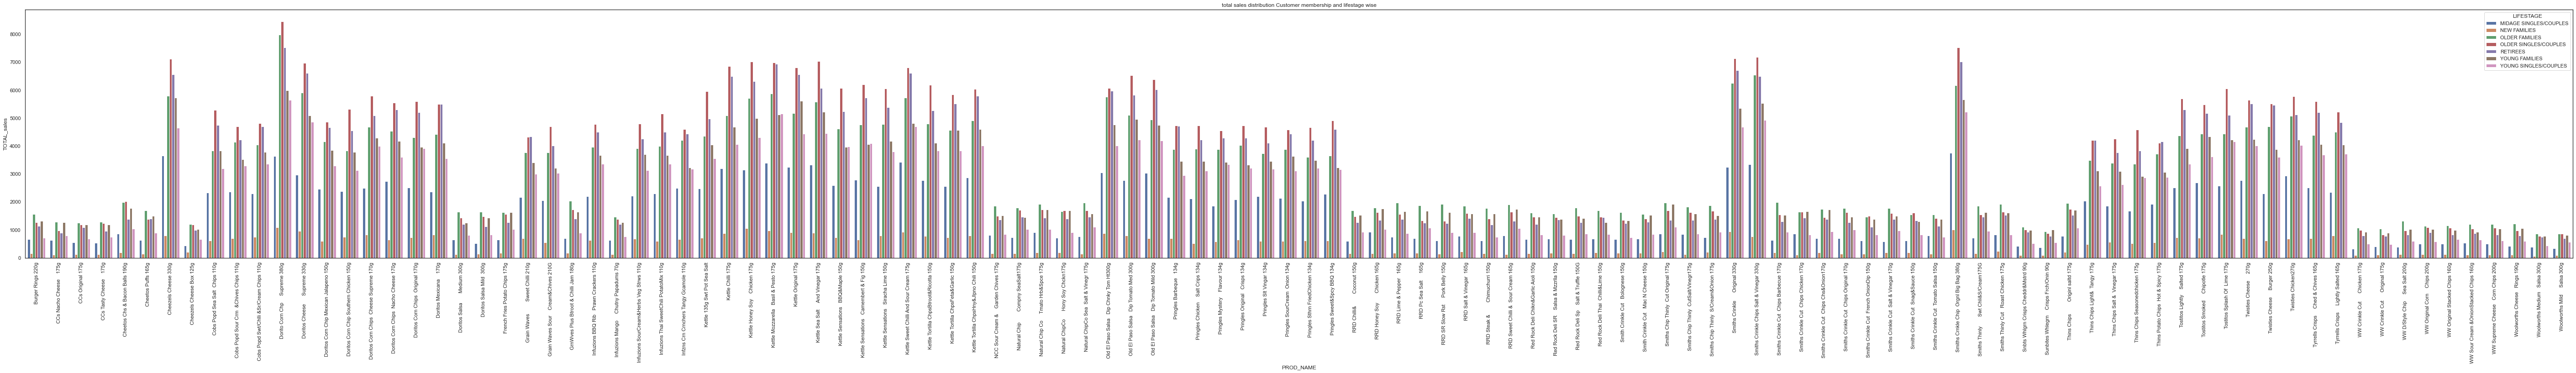

In [147]:
plt.figure(figsize=(100, 10))
plt.title("total sales distribution Customer membership and lifestage wise")
ac=sb.barplot(x=productwise_sales1.PROD_NAME, y= productwise_sales1.TOTAL_sales, hue= productwise_sales1.LIFESTAGE )
plt.xticks(rotation=90)
plt.savefig('product_sales.jpg')

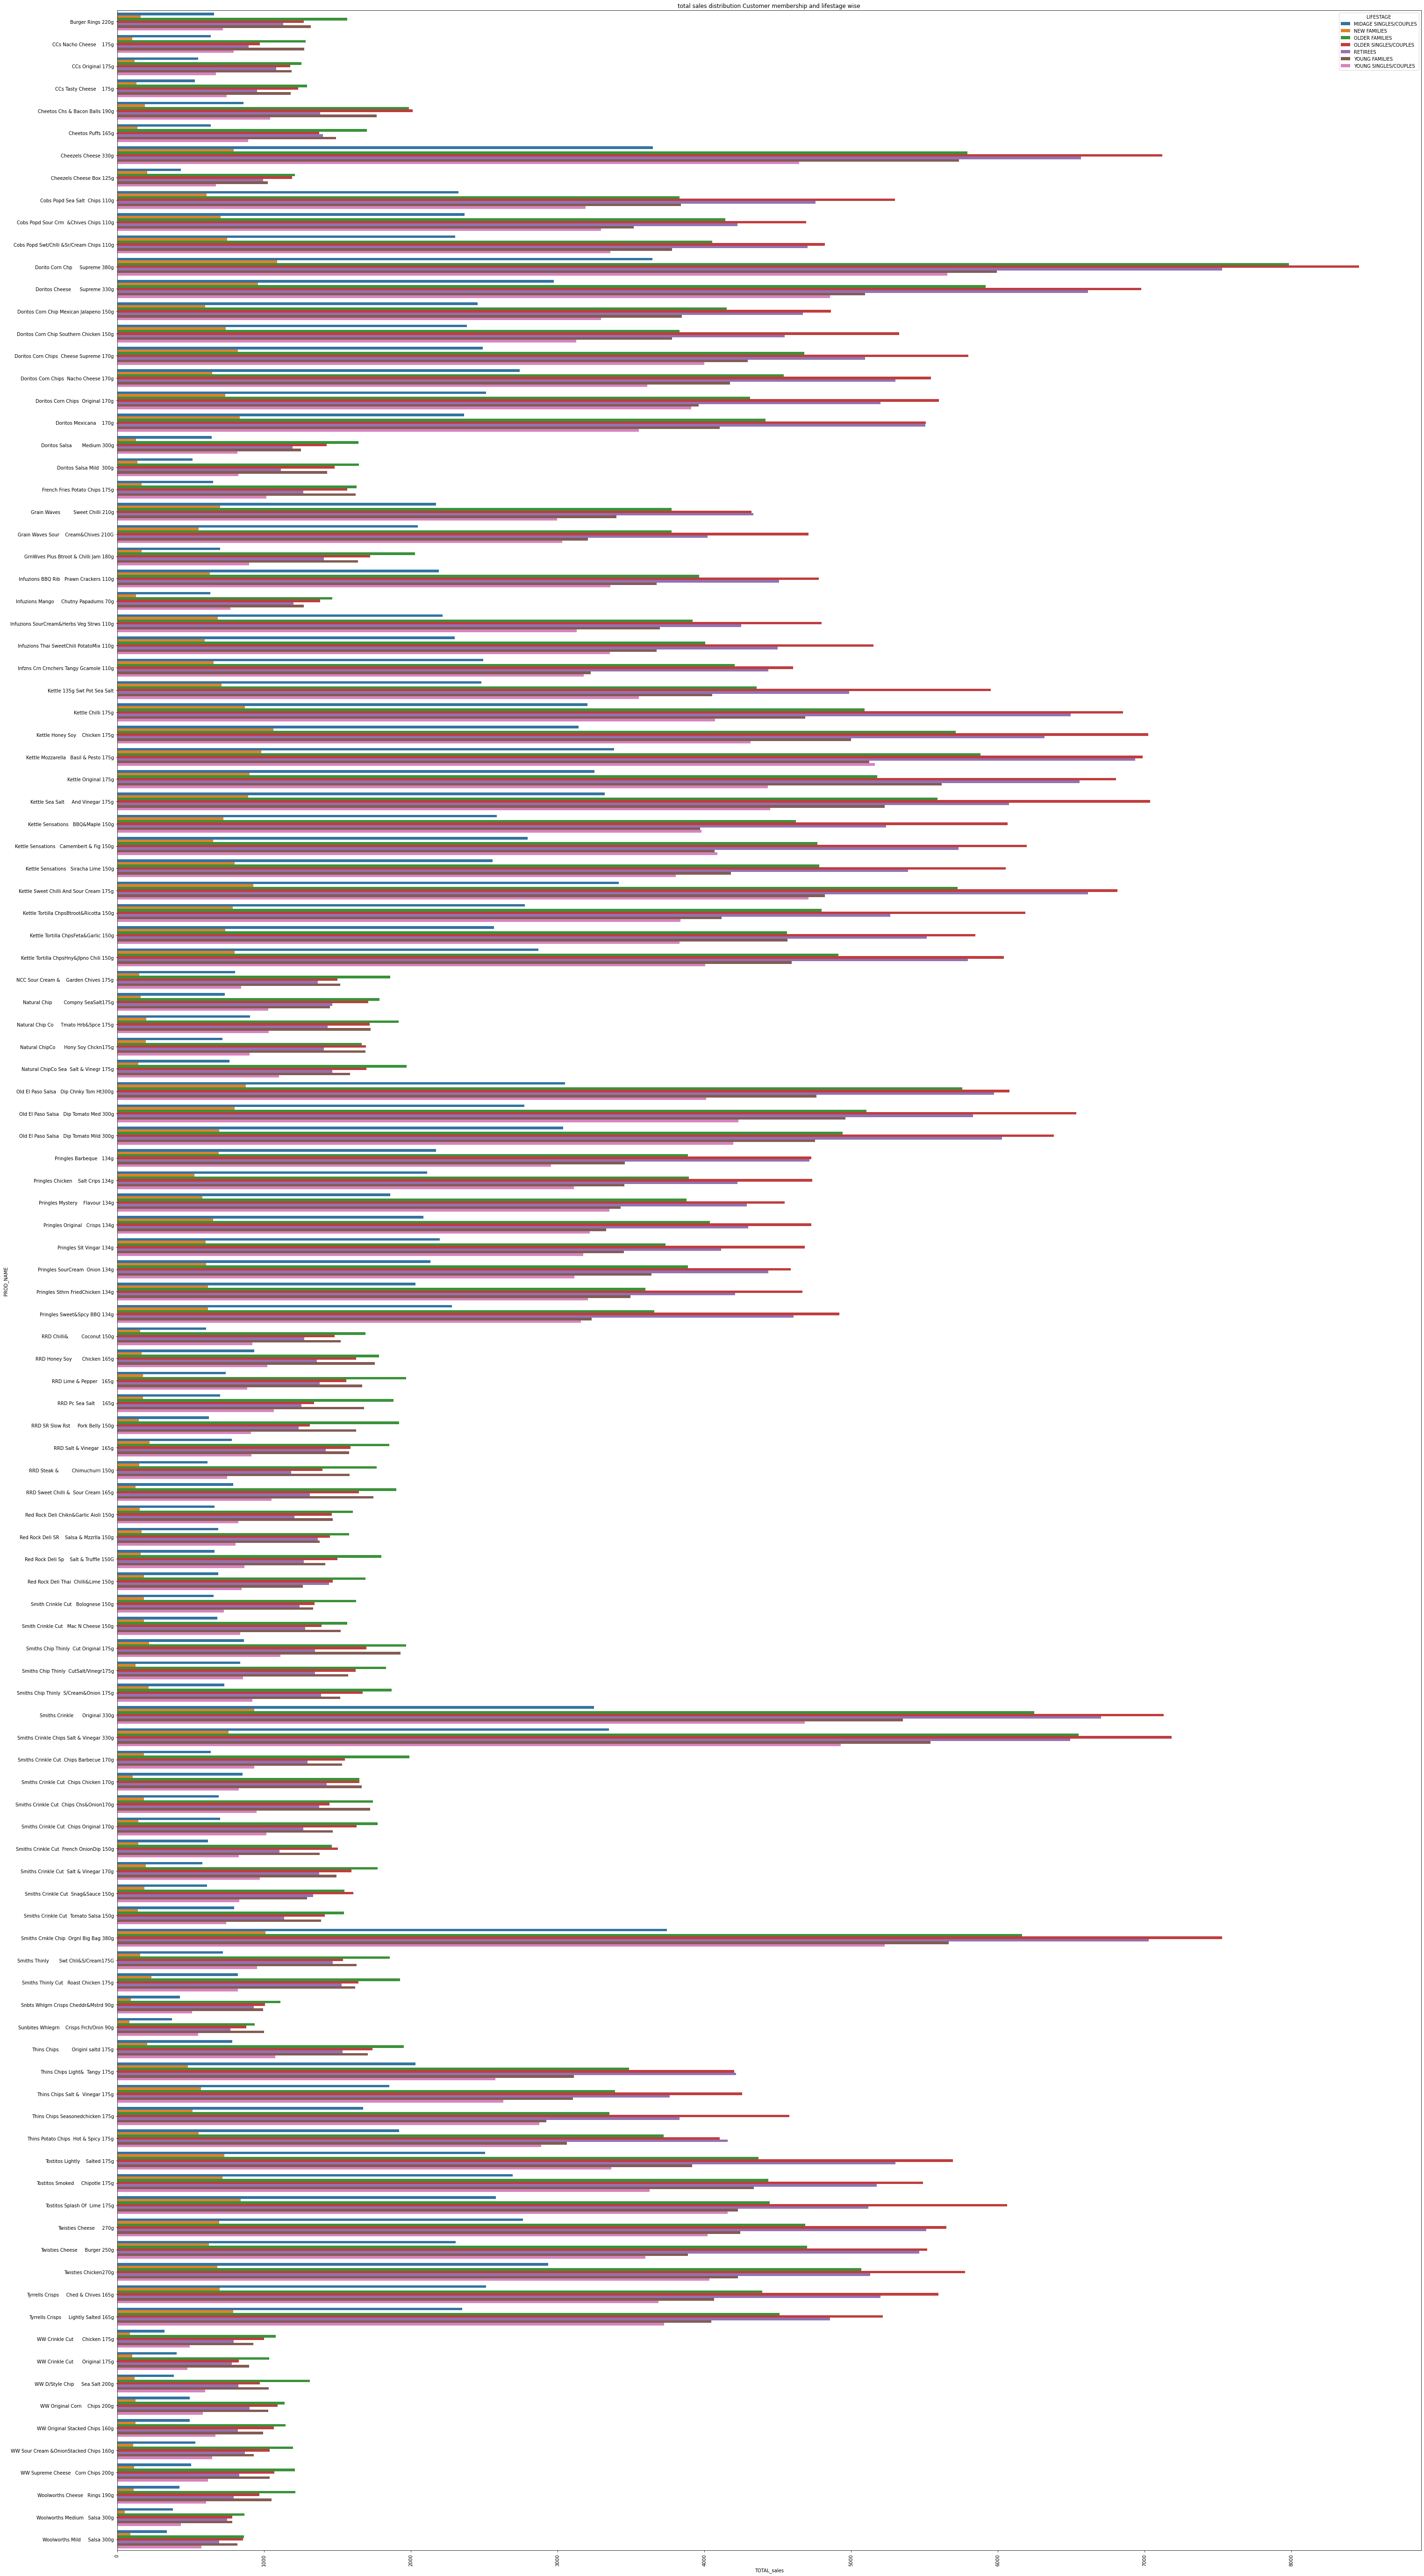

In [128]:
plt.figure(figsize=(50, 100))
plt.title("total sales distribution Customer membership and lifestage wise")
ax=sb.barplot(x=productwise_sales1.TOTAL_sales, y= productwise_sales1.PROD_NAME, hue= productwise_sales1.LIFESTAGE )
plt.xticks(rotation=90)
plt.savefig('product_sales1.jpg')

# Premium membership wise sales per product

In [140]:
premiumwise_sales =merge_all.groupby(['PREMIUM_CUSTOMER','PROD_NAME']).TOT_SALES.agg([sum])
premiumwise_sales.rename(columns = {'sum':'TOTAL_sales'}, inplace = True)
print(premiumwise_sales)

                                                         TOTAL_sales
PREMIUM_CUSTOMER PROD_NAME                                          
Budget           Burger Rings 220g                            2527.7
                 CCs Nacho Cheese    175g                     2255.4
                 CCs Original 175g                            2194.5
                 CCs Tasty Cheese    175g                     2207.1
                 Cheetos Chs & Bacon Balls 190g               3352.8
...                                                              ...
Premium          WW Sour Cream &OnionStacked Chips 160g       1482.0
                 WW Supreme Cheese   Corn Chips 200g          1520.0
                 Woolworths Cheese   Rings 190g               1386.0
                 Woolworths Medium   Salsa 300g               1113.0
                 Woolworths Mild     Salsa 300g               1213.5

[342 rows x 1 columns]


In [141]:
pi1=premiumwise_sales.index
type(pi1)
premiumwise_sales.reset_index()

,PREMIUM_CUSTOMER,PROD_NAME,TOTAL_sales
0,Budget,Burger Rings 220g,2527.7
1,Budget,CCs Nacho Cheese 175g,2255.4
2,Budget,CCs Original 175g,2194.5
3,Budget,CCs Tasty Cheese 175g,2207.1
4,Budget,Cheetos Chs & Bacon Balls 190g,3352.8
...,...,...,...
337,Premium,WW Sour Cream &OnionStacked Chips 160g,1482.0
338,Premium,WW Supreme Cheese Corn Chips 200g,1520.0
339,Premium,Woolworths Cheese Rings 190g,1386.0
340,Premium,Woolworths Medium Salsa 300g,1113.0


In [145]:
premiumwise_sales1= premiumwise_sales.reset_index()
print(premiumwise_sales1)
premiumwise_sales1.info()

    PREMIUM_CUSTOMER                               PROD_NAME  TOTAL_sales
0             Budget                       Burger Rings 220g       2527.7
1             Budget                CCs Nacho Cheese    175g       2255.4
2             Budget                       CCs Original 175g       2194.5
3             Budget                CCs Tasty Cheese    175g       2207.1
4             Budget          Cheetos Chs & Bacon Balls 190g       3352.8
..               ...                                     ...          ...
337          Premium  WW Sour Cream &OnionStacked Chips 160g       1482.0
338          Premium     WW Supreme Cheese   Corn Chips 200g       1520.0
339          Premium          Woolworths Cheese   Rings 190g       1386.0
340          Premium          Woolworths Medium   Salsa 300g       1113.0
341          Premium          Woolworths Mild     Salsa 300g       1213.5

[342 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (to

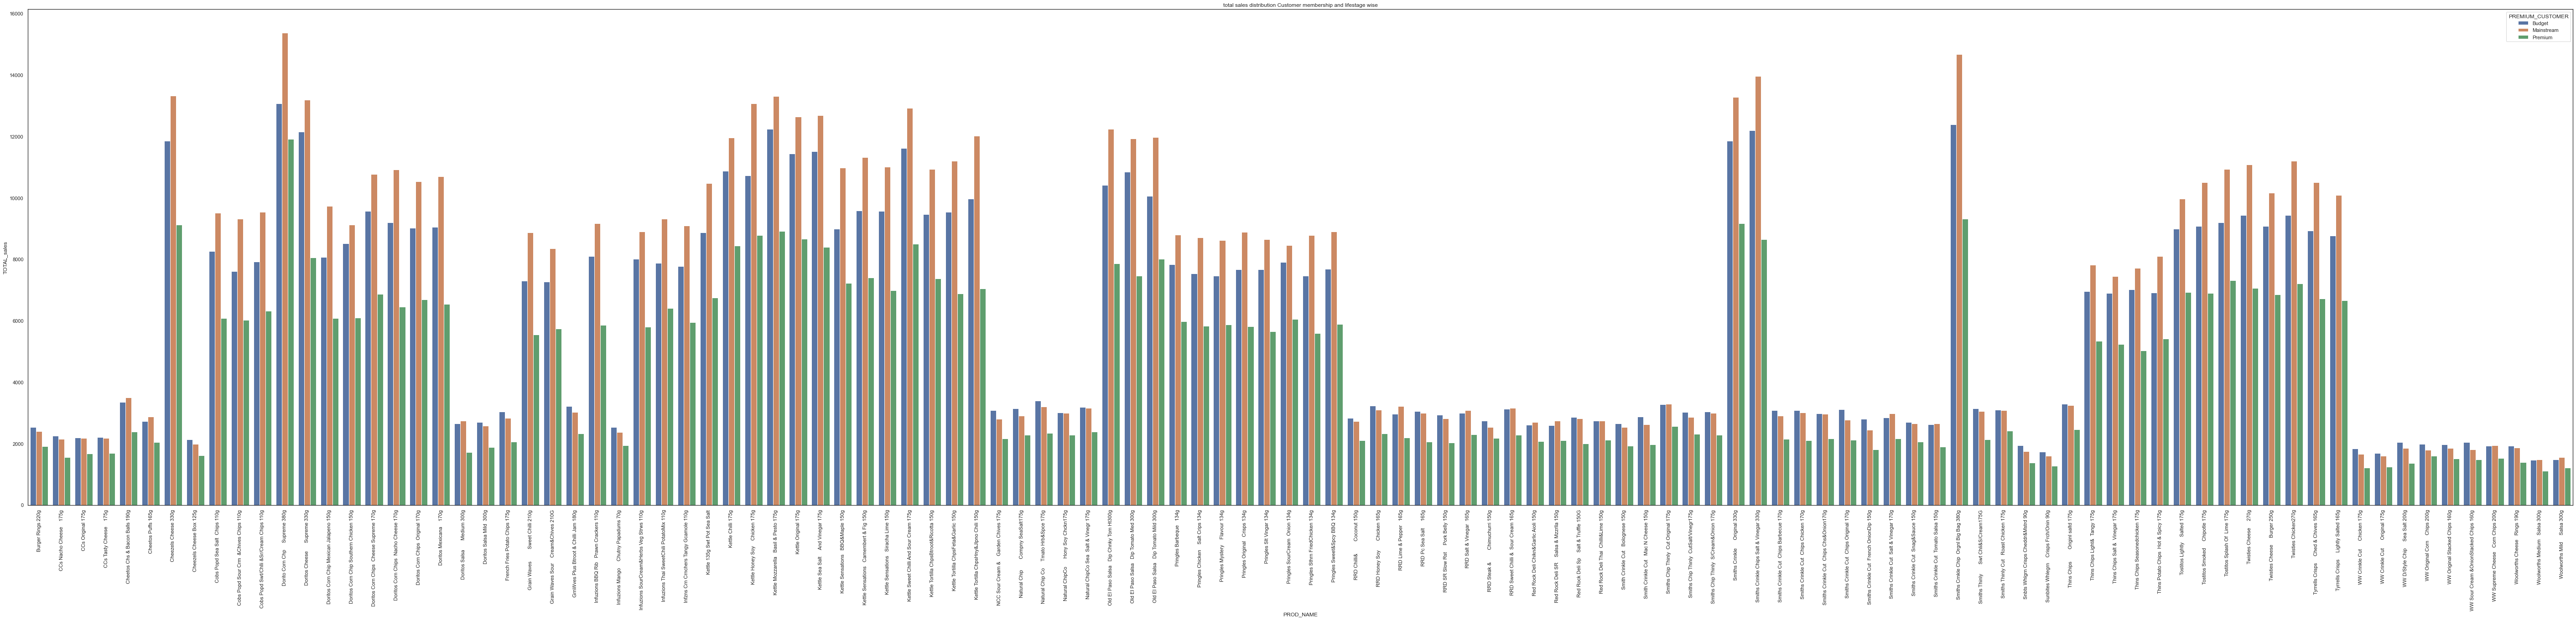

In [321]:
plt.figure(figsize=(100, 20))
plt.title("total sales distribution Customer membership and lifestage wise")
ac=sb.barplot(x=premiumwise_sales1.PROD_NAME, y= premiumwise_sales1.TOTAL_sales, hue= premiumwise_sales1.PREMIUM_CUSTOMER)
plt.xticks(rotation=90)
plt.savefig('PREMIUM_WISE.jpg')

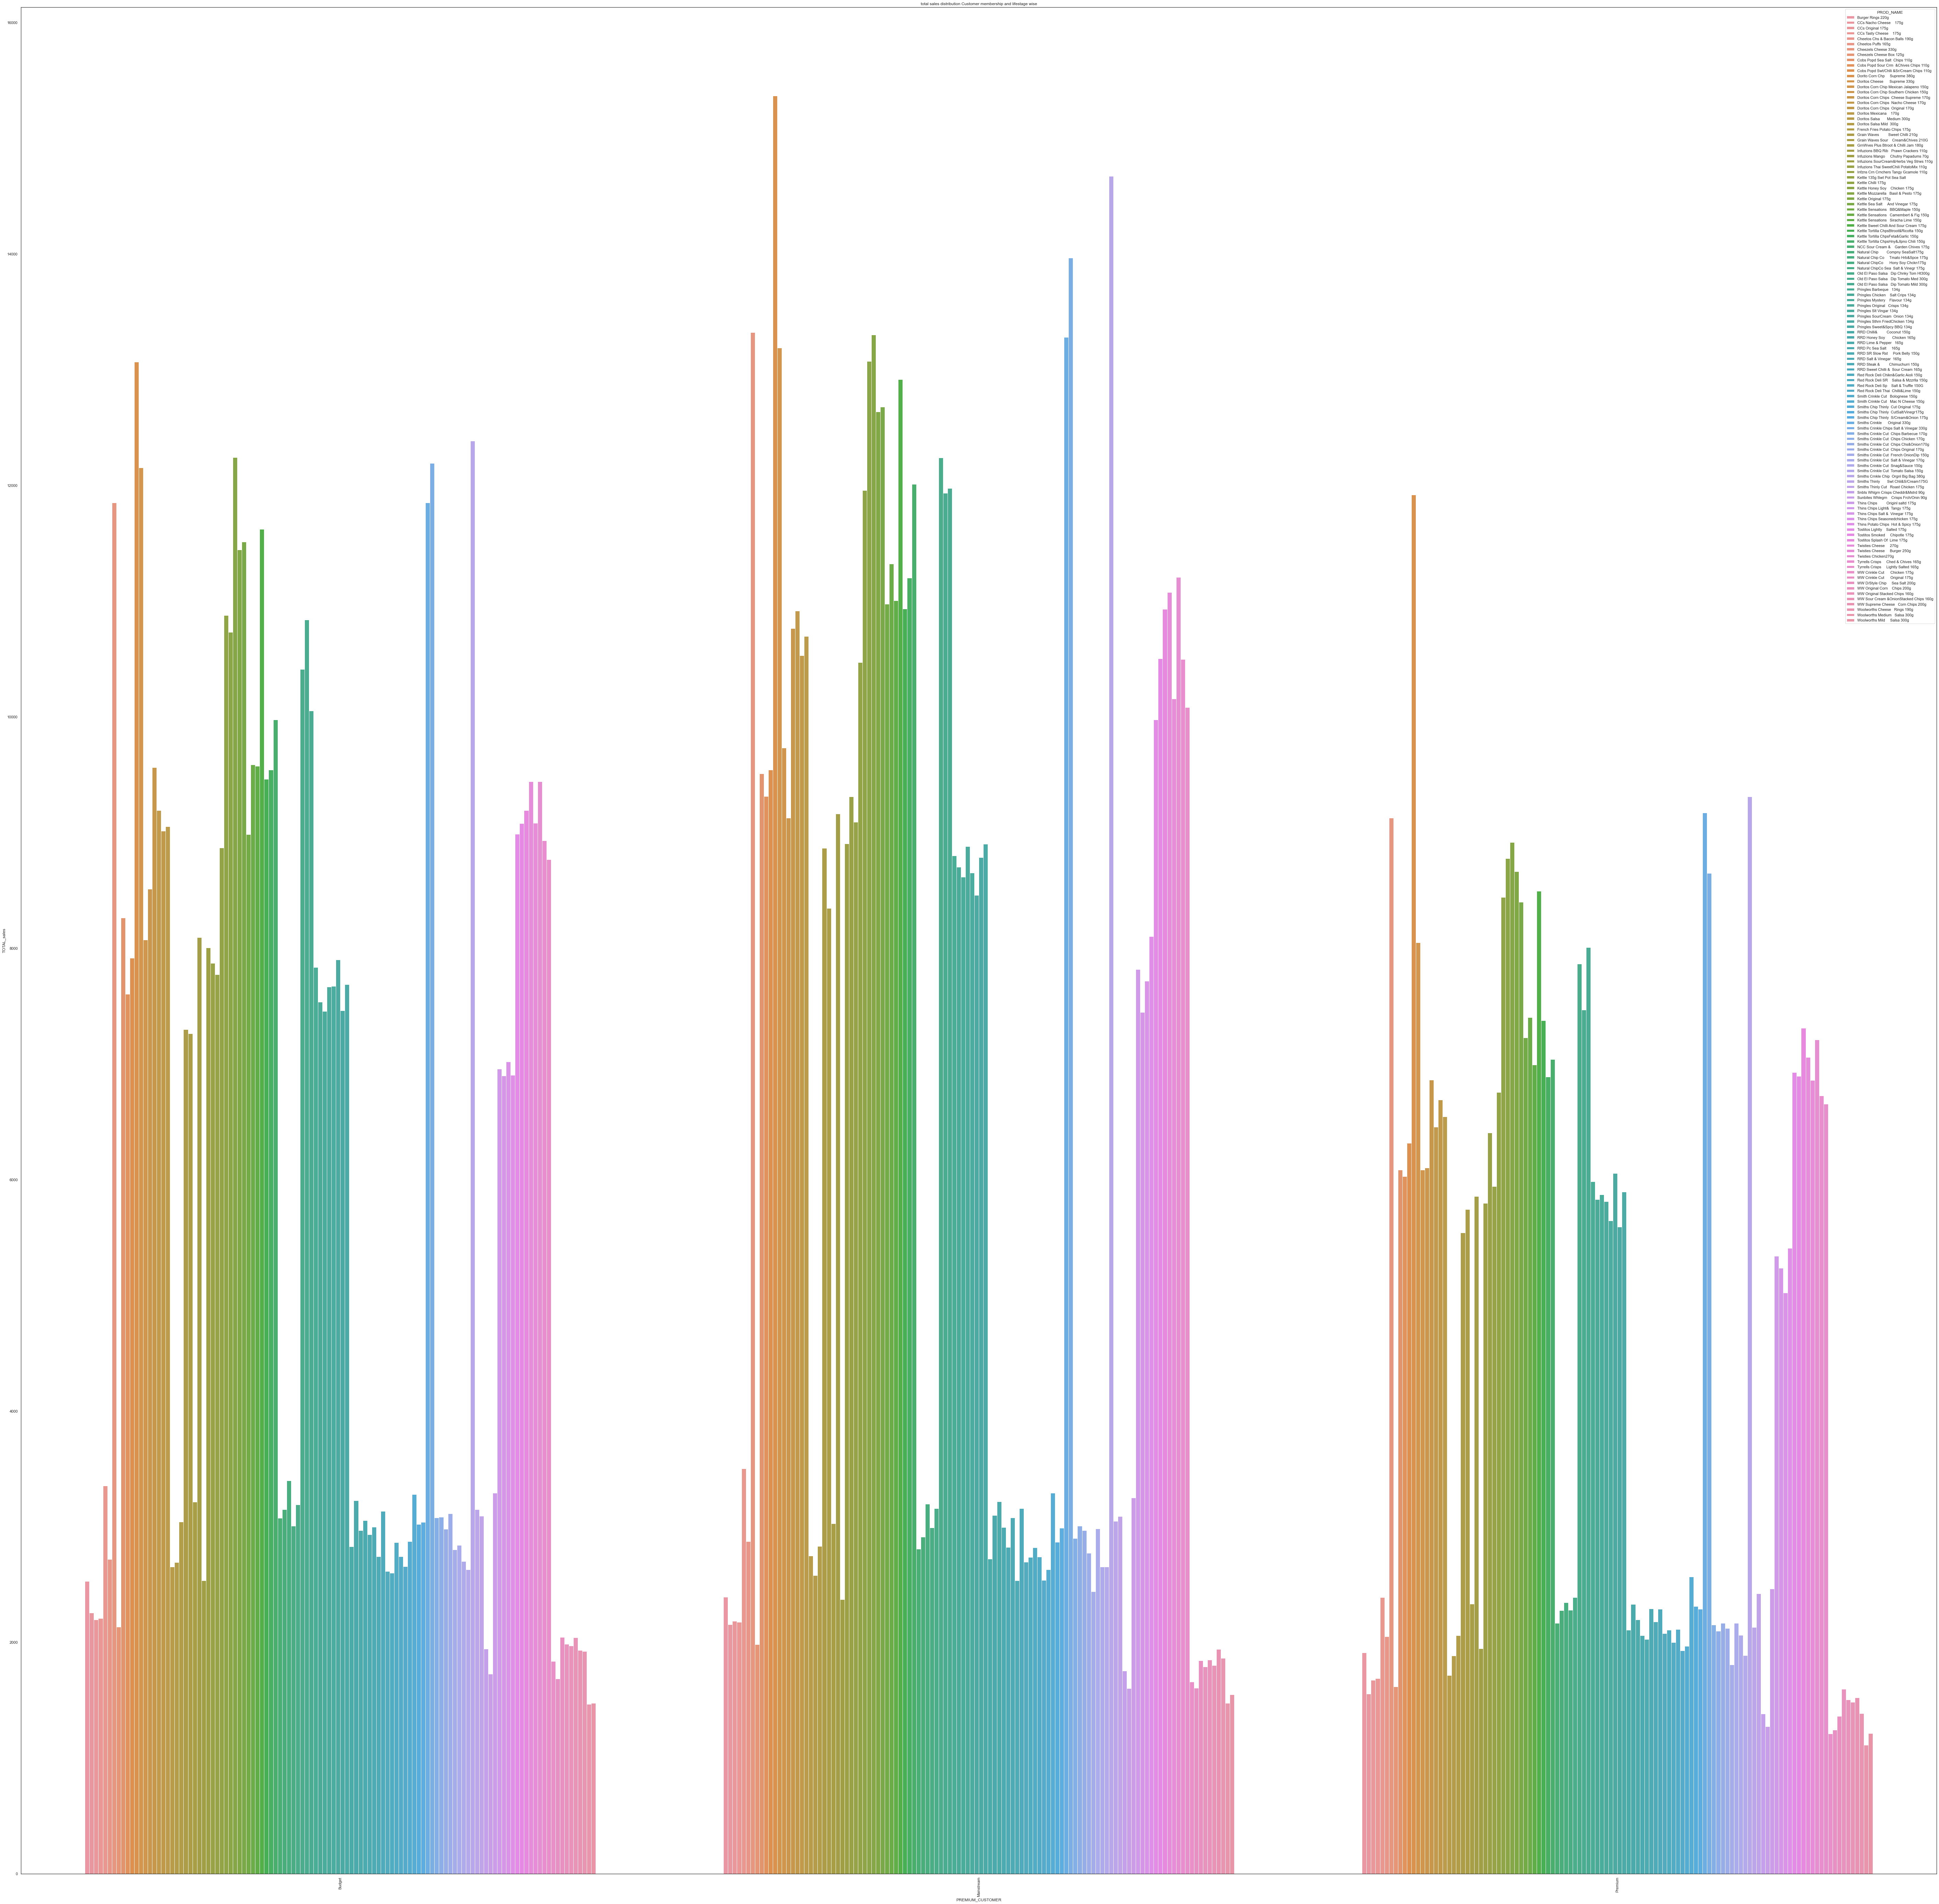

In [163]:
plt.figure(figsize=(100, 100))
plt.title("total sales distribution Customer membership and lifestage wise")
ac=sb.barplot(x=premiumwise_sales1.PREMIUM_CUSTOMER, y= premiumwise_sales1.TOTAL_sales, hue= premiumwise_sales1.PROD_NAME)
plt.xticks(rotation=90)
plt.savefig('PREMIUM_WISE1.jpg')

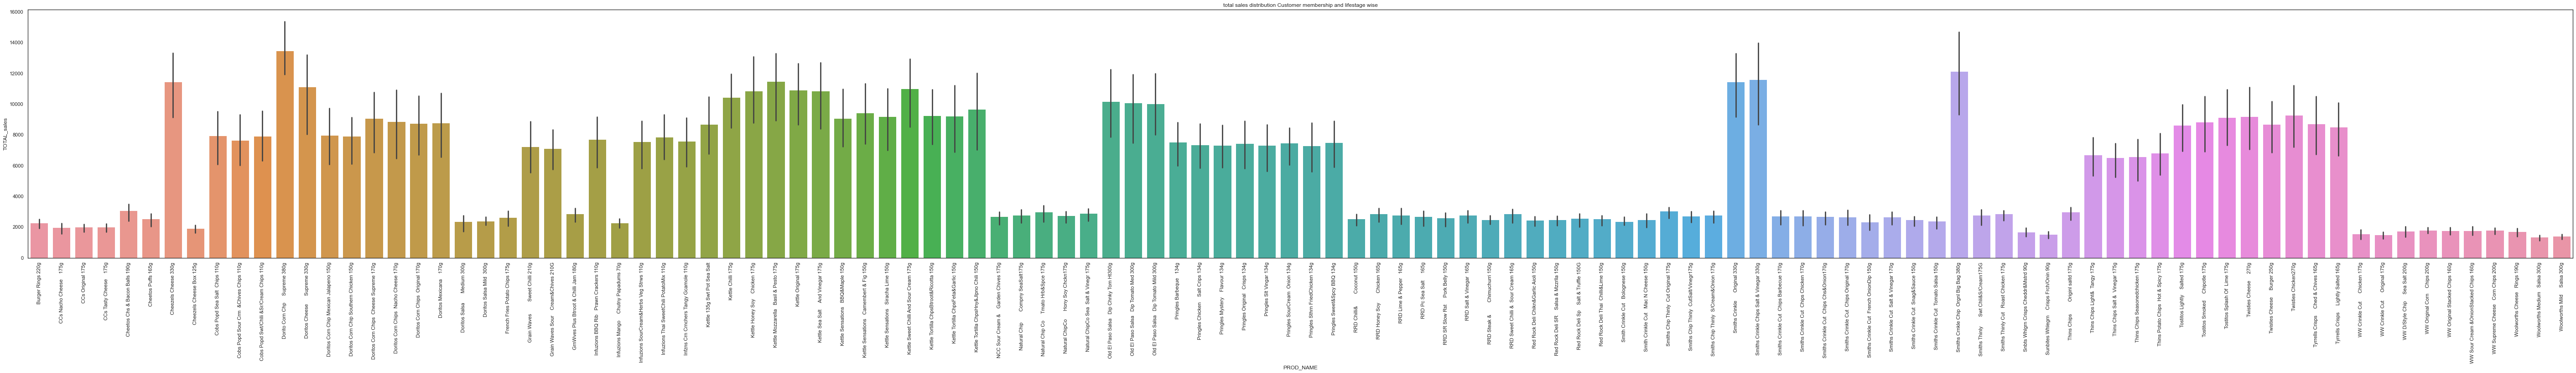

In [164]:

plt.figure(figsize=(100, 10))
plt.title("total sales distribution Customer membership and lifestage wise")
ac=sb.barplot(x=premiumwise_sales1.PROD_NAME, y= premiumwise_sales1.TOTAL_sales)
plt.xticks(rotation=90)
plt.savefig('PREMIUM_WISE33.jpg')

In [269]:
#sorting total sales value 
premiumwise_sales2=premiumwise_sales1.sort_values(by='TOTAL_sales', ascending=False)
print(premiumwise_sales2)

    PREMIUM_CUSTOMER                                 PROD_NAME  TOTAL_sales
125       Mainstream          Dorito Corn Chp     Supreme 380g      15366.0
200       Mainstream    Smiths Crnkle Chip  Orgnl Big Bag 380g      14673.3
191       Mainstream  Smiths Crinkle Chips Salt & Vinegar 330g      13965.0
120       Mainstream                      Cheezels Cheese 330g      13320.9
147       Mainstream    Kettle Mozzarella   Basil & Pesto 175g      13300.2
..               ...                                       ...          ...
318          Premium  Sunbites Whlegrn    Crisps Frch/Onin 90g       1273.3
333          Premium         WW Crinkle Cut      Original 175g       1242.7
341          Premium            Woolworths Mild     Salsa 300g       1213.5
332          Premium          WW Crinkle Cut      Chicken 175g       1208.7
340          Premium            Woolworths Medium   Salsa 300g       1113.0

[342 rows x 3 columns]


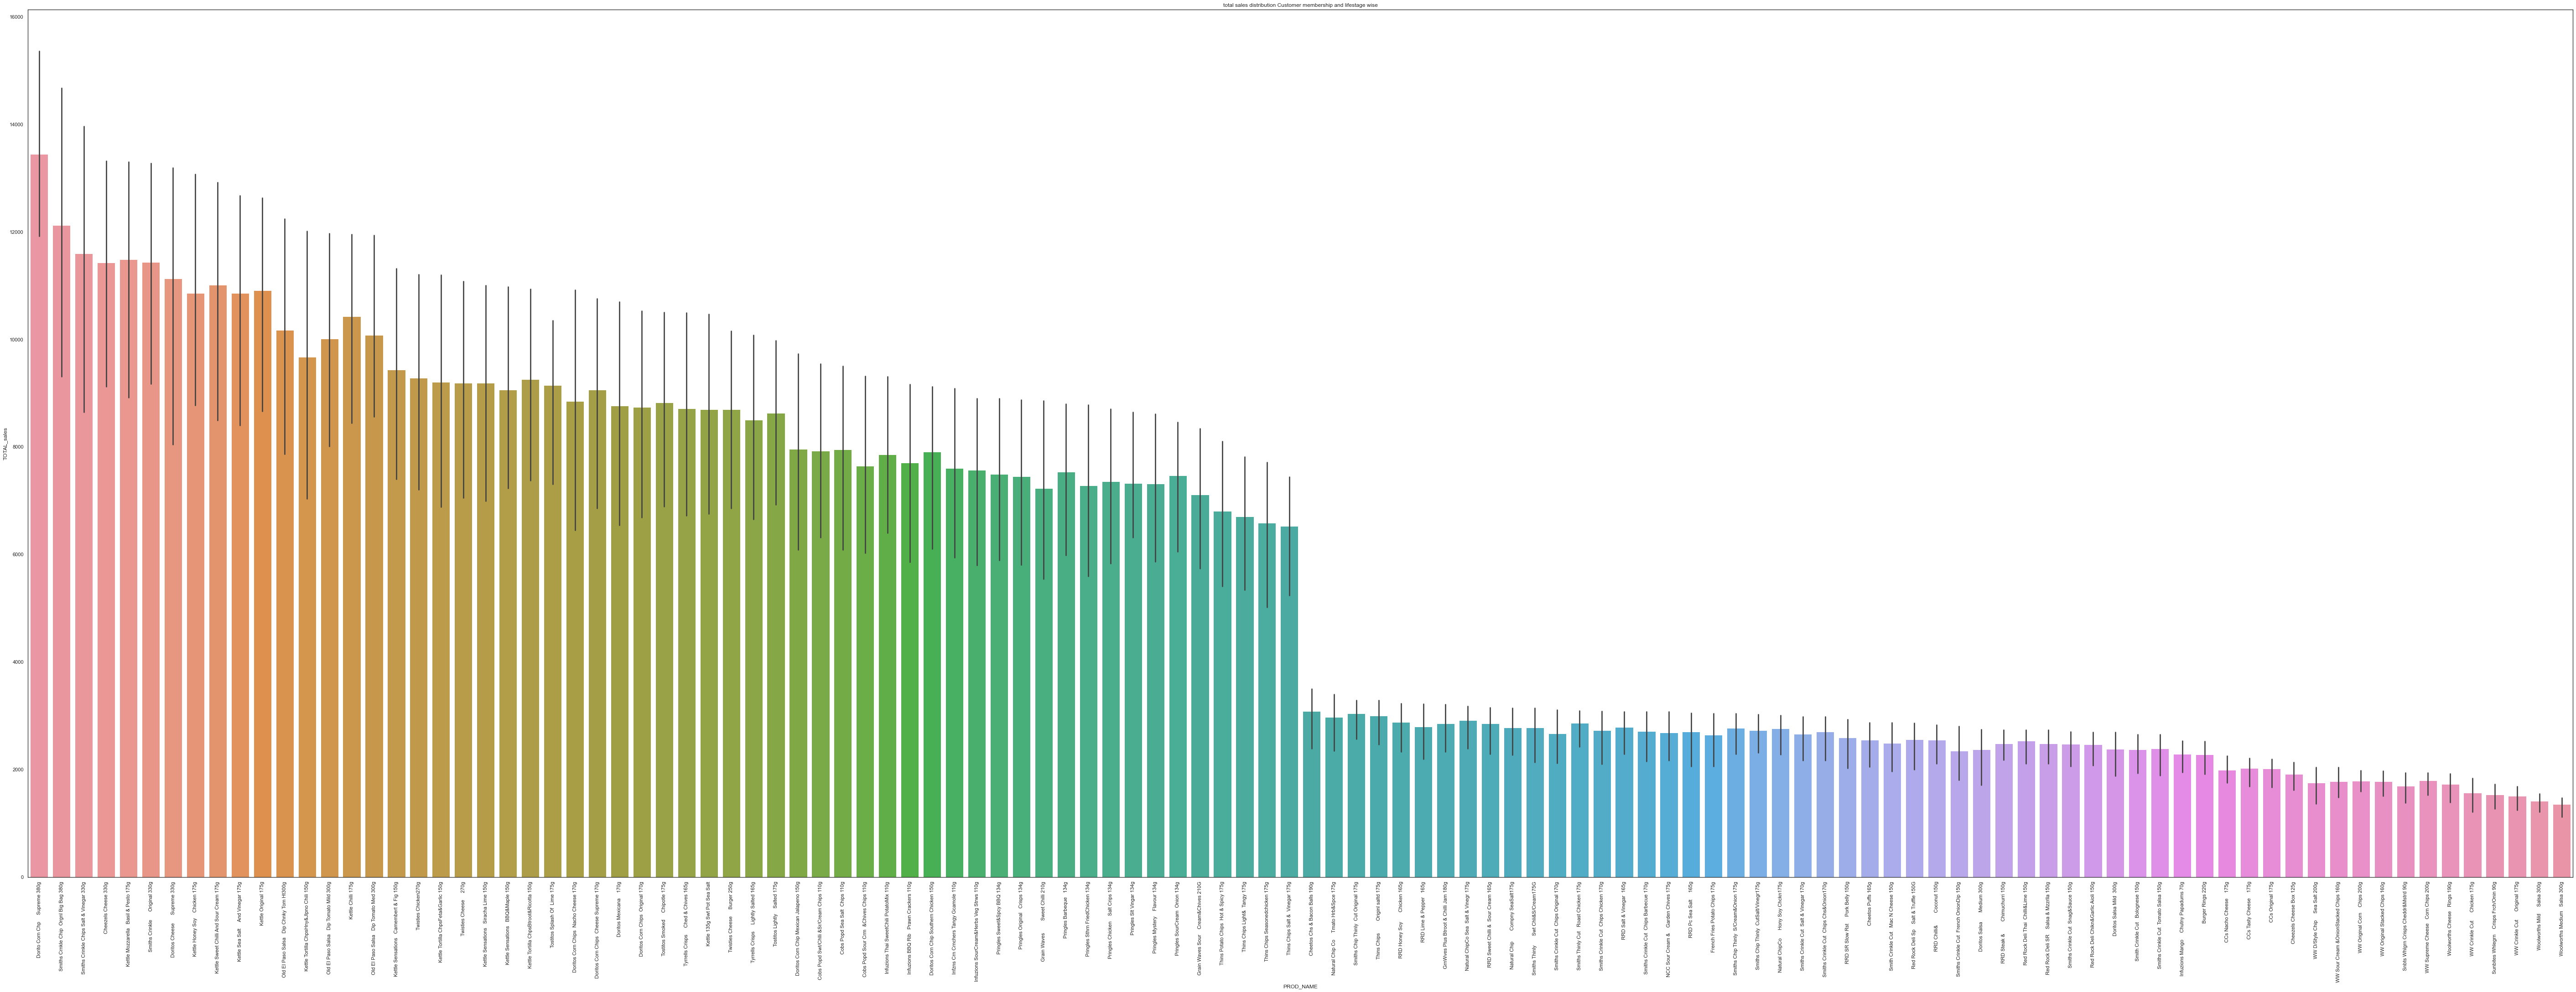

In [276]:
plt.figure(figsize=(100, 35))
plt.title("total sales distribution Customer membership and lifestage wise")
ac=sb.barplot(x=premiumwise_sales2.PROD_NAME, y= premiumwise_sales2.TOTAL_sales)
plt.xticks(rotation=90)
plt.savefig('new.jpg')

In [174]:
premiumwise_sales2.describe()
premiumwise_sales2.head()


,PREMIUM_CUSTOMER,PROD_NAME,TOTAL_sales
125,Mainstream,Dorito Corn Chp Supreme 380g,15366.0
200,Mainstream,Smiths Crnkle Chip Orgnl Big Bag 380g,14673.3
191,Mainstream,Smiths Crinkle Chips Salt & Vinegar 330g,13965.0
120,Mainstream,Cheezels Cheese 330g,13320.9
147,Mainstream,Kettle Mozzarella Basil & Pesto 175g,13300.2


In [175]:
premiumwise_sales2.max

<bound method DataFrame.max of     PREMIUM_CUSTOMER                                 PROD_NAME  TOTAL_sales
125       Mainstream          Dorito Corn Chp     Supreme 380g      15366.0
200       Mainstream    Smiths Crnkle Chip  Orgnl Big Bag 380g      14673.3
191       Mainstream  Smiths Crinkle Chips Salt & Vinegar 330g      13965.0
120       Mainstream                      Cheezels Cheese 330g      13320.9
147       Mainstream    Kettle Mozzarella   Basil & Pesto 175g      13300.2
..               ...                                       ...          ...
318          Premium  Sunbites Whlegrn    Crisps Frch/Onin 90g       1273.3
333          Premium         WW Crinkle Cut      Original 175g       1242.7
341          Premium            Woolworths Mild     Salsa 300g       1213.5
332          Premium          WW Crinkle Cut      Chicken 175g       1208.7
340          Premium            Woolworths Medium   Salsa 300g       1113.0

[342 rows x 3 columns]>

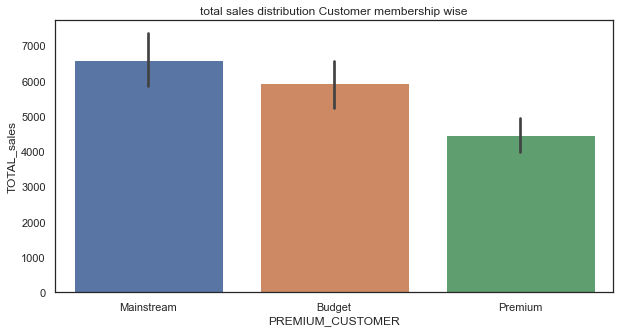

In [179]:
plt.figure(figsize=(10, 5))
plt.title("total sales distribution Customer membership wise")
ac=sb.barplot(x=premiumwise_sales2.PREMIUM_CUSTOMER, y= premiumwise_sales2.TOTAL_sales)
plt.savefig('new1.jpg')

In [297]:
merge_all1= merge_all['TOT_SALES']/ transaction_data['PROD_QTY']
merge_all1.max()
# merge_all["cost_per_product"]= merge_all1
# print(merge_all)

325.0

In [299]:
merge_all1.describe()

count    264836.000000
mean          4.024233
std           2.037122
min           0.021000
25%           2.900000
50%           3.800000
75%           4.600000
max         325.000000
dtype: float64

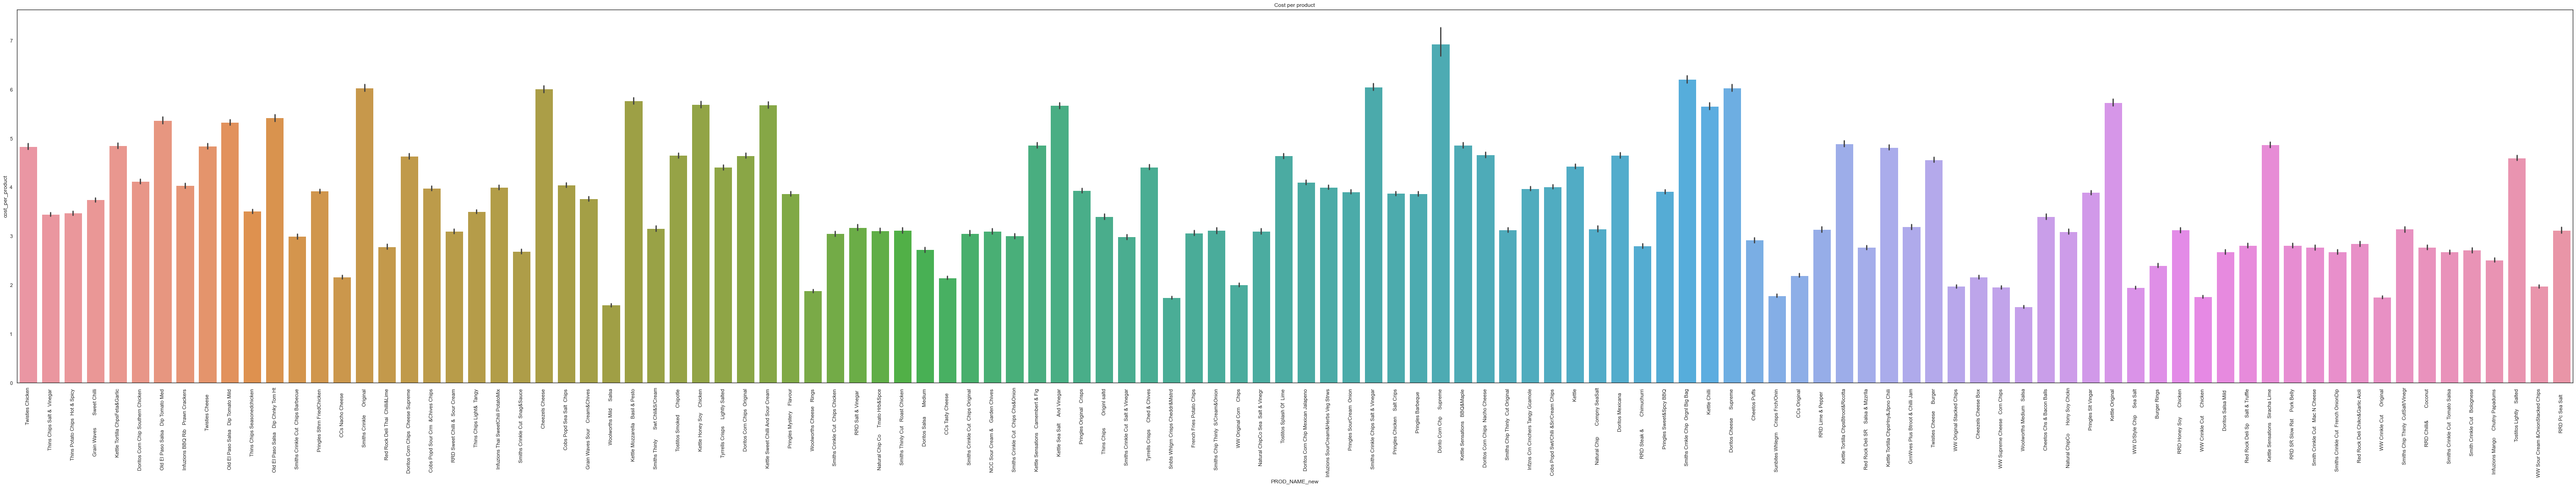

In [291]:
merge_all.sort_values(by="cost_per_product",ascending=False)
print(merger_all)
plt.figure(figsize=(100, 15))
plt.title("Cost per product")
ac=sb.barplot(x=merge_all.PROD_NAME_new, y= merge_all.cost_per_product)
plt.xticks(rotation=90)
plt.savefig('new11.jpg')

In [294]:
merge_all_sorted= merge_all.sort_values(by="cost_per_product",ascending=False)
print(merge_all_sorted)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
120676 2019-05-20        226          226000  226210         4   
120677 2018-08-19        226          226000  226201         4   
82013  2018-08-20        222          222005  221532         7   
126977 2019-05-17         81           81100   80189       102   
31082  2019-05-14        126          126253  130179        89   
...           ...        ...             ...     ...       ...   
227758 2019-02-05         53           53136   47390        83   
31002  2019-01-03         73           73370   72712        83   
231919 2018-10-27         16           16091   14232        96   
30038  2018-07-01         28           28041   24771         2   
228568 2019-02-03        135          135158  138329       112   

                                      PROD_NAME  PROD_QTY  TOT_SALES  \
120676         Dorito Corn Chp     Supreme 380g       200      650.0   
120677         Dorito Corn Chp     Supreme 380g       200      

In [295]:
650/200

3.25